In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [2]:
#creating  sample dataset
np.random.seed(50)
data=np.random.normal(loc=50,scale=10,size=100)#mean=50 std=10
outliers=np.array([10,110,5,120,19,220,155,1])
data=np.concatenate([data,outliers])


In [3]:
#create a df
df=pd.DataFrame(data,columns=['Values'])

In [4]:
df.head()

,Values
0,34.396479
1,49.690224
2,43.790716
3,35.354195
4,64.119461


In [5]:
df.tail()

,Values
103,120.0
104,19.0
105,220.0
106,155.0
107,1.0


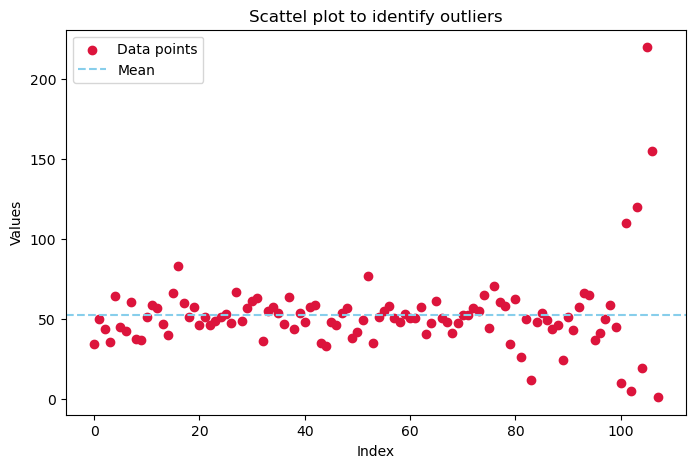

In [6]:
#Identifying outliers using scatter plot 

plt.figure(figsize=(8,5))
plt.scatter(range(len(df)),df['Values'],color='crimson',label='Data points')
plt.axhline(y=df['Values'].mean(),color='skyblue',linestyle='--',label='Mean')
plt.xlabel("Index")
plt.ylabel("Values")
plt.title("Scattel plot to identify outliers")
plt.legend()
plt.show()

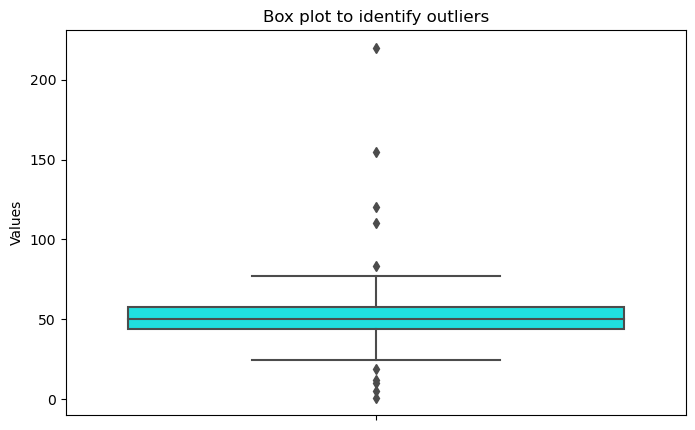

In [7]:
#Identifying outliers using box plot 
plt.figure(figsize=(8,5))
sns.boxplot(data=df,y="Values",color="cyan")
plt.title("Box plot to identify outliers")
plt.show()

**using zscore to identify outliers**

z-score formula:

z=x-mean/std (x=data point)

steps:

    1)compute the z-score for each data point
    
    2)if z-score>3 or <-3 mark as outlier

In [8]:
#using zscore to identify outliers
df['Z-score']=zscore(df['Values'])
df['Outlier_z']=df['Z-score'].apply(lambda x:'Outlier' if abs(x) > 3 else 'Normal')
print(df[df['Outlier_z']=="Outlier"])

     Values   Z-score Outlier_z
105   220.0  6.757341   Outlier
106   155.0  4.133633   Outlier


**Interquartile Range (IQR) Method**

IQR=Q3-Q1

Steps:

     1)calculate Q1(25th percentile) and Q3(75th percentile)
     
     2)compute IQR=Q3-Q1
     
     3)Define Lower  &  upper bounds:
     
            lower bound =Q1 - 1.5 *IQR
             
            upper bound = Q3 + 1.5 *IQR
      
      4)Any value outside of these bounds is outlier 

In [11]:
Q1=df['Values'].quantile(0.25)
Q3=df['Values'].quantile(0.75)

#IQR computing
IQR=Q3-Q1

#bounds
LB=Q1-1.5 *IQR
UB=Q3+1.5 *IQR

#identifying outliers
df['Outlier_IQR']=df['Values'].apply(lambda x:'Outlier' if (x <LB or x >UB) else 'Normal')
print(df[df['Outlier_IQR']=='Outlier'])


         Values   Z-score Outlier_z Outlier_IQR
16    83.140753  1.233053    Normal     Outlier
83    11.901096 -1.642517    Normal     Outlier
100   10.000000 -1.719254    Normal     Outlier
101  110.000000  2.317220    Normal     Outlier
102    5.000000 -1.921078    Normal     Outlier
103  120.000000  2.720867    Normal     Outlier
104   19.000000 -1.355972    Normal     Outlier
105  220.000000  6.757341   Outlier     Outlier
106  155.000000  4.133633   Outlier     Outlier
107    1.000000 -2.082537    Normal     Outlier


**Finding summary**

1)scatter plot - Outliers appear far from the main cluster

2)Box plot - Outliers are outside the whiskers

3)Z-score - values with Z>3 or Z<-3 are outliers

4)IQR method - values outside [Q1-1.5*IQR  Q3+1.5*IQR] are outliers


**Finding Outliers Using the IQR Method with a 5-Number Summary**
The 5-number summary consists of:
 
Minimum (Q0) → The smallest value in the dataset.
 
First Quartile (Q1) → The 25th percentile (lower quartile).
 
Median (Q2) → The 50th percentile (middle value).
 
Third Quartile (Q3) → The 75th percentile (upper quartile).
 
Maximum (Q4) → The largest value in the dataset.
has context menu

The Interquartile Range (IQR) is calculated as:
 
IQR=Q3−Q1
 
Any value outside the range:
 
[Q1−1.5×IQR,Q3+1.5×IQR]  is considered an outlier.

**Let's generate a dataset, compute the 5-number summary, and find the outliers using the IQR**

In [ ]:
np.random.seed(50)
data=np.random.normal(loc=50,scale=10,size=100)#mean=50 std=10
outliers=np.array([10,110,5,120])
data=np.concatenate([data,outliers])


In [12]:
Q1=np.percentile(data,25)
Q2=np.median(data)
Q3=np.percentile(data,75)
minv=np.min(data)
maxv=np.max(data)

In [13]:
IQR=Q3-Q1
LB=Q1 - 1.5 *IQR
UB=Q3 + 1.5 *IQR

In [15]:
outliers=data[(data < LB) | (data >UB)]

In [16]:
print(f"5-Number Summary:\nMin:{minv},Q1:{Q1},Median(Q2):{Q2},Q3:{Q3},Max:{maxv}")

5-Number Summary:
Min:1.0,Q1:43.78199391125503,Median(Q2):50.45256847180777,Q3:57.48307107103271,Max:220.0


In [17]:
print(f"IQR:{IQR}")

IQR:13.701077159777682


In [18]:
print(f"Lower bound:{LB},Upper Bound:{UB}")

Lower bound:23.230378171588505,Upper Bound:78.03468681069924


In [19]:
print(f"Outliers:{outliers}")

Outliers:[ 83.14075346  11.90109622  10.         110.           5.
 120.          19.         220.         155.           1.        ]
